In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import random
from scipy.stats import binom, uniform, norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('taxis')

# 통계량 확인하기
* 평균, 중앙값, 최빈값 구하기


In [3]:
mean_val = data['total'].mean()
median_val = data['total'].median()

# 최빈값을 구하기 위해 구간별로 데이터 나누고 범주형 데이터로 변환하기
binned_total = pd.cut(data['total'], bins=100, right=False)
modal_interval = binned_total.mode()[0]
mode_val = modal_interval.mid

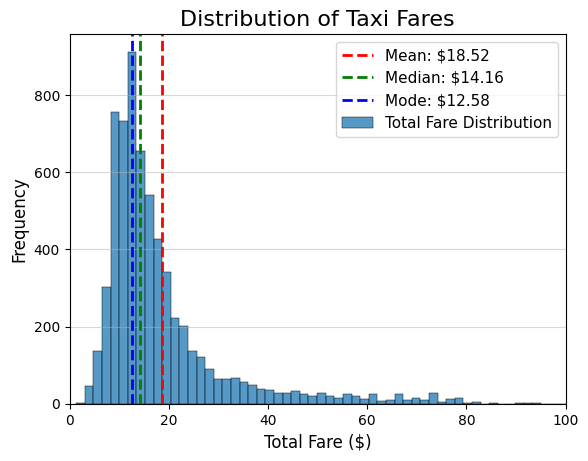

In [4]:
plt.figure()

sns.histplot(data['total'], bins=100, label='Total Fare Distribution')
plt.xlim(0,100)

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: ${mode_val:.2f}')

plt.title('Distribution of Taxi Fares', fontsize=16)
plt.xlabel('Total Fare ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.5)

plt.show()


왜도: 데이터 분포의 비대칭성을 나타내는 지표  
첨도: 분포의 뾰족한 정도와 꼬리의 두께를 나타내는 지표

In [5]:
skewness = data['total'].skew()
kurtosis = data['total'].kurt()

print(f"왜도 (Skewness): {skewness:.4f}")
print(f"첨도 (Kurtosis): {kurtosis:.4f}")

왜도 (Skewness): 3.0933
첨도 (Kurtosis): 15.0657


# 분산과 표준편차, 표준오차

In [6]:
variance = data['total'].var()
std_dev = data['total'].std()

# 표준오차 계산 (Standard Error of the Mean)
# 표준오차는 표본 표준편차를 표본 크기의 제곱근으로 나눈 값입니다.
std_error = std_dev / np.sqrt(len(data['total']))

print(f"분산 (Variance): {variance:.2f}")
print(f"표준편차 (Standard Deviation): {std_dev:.2f}")
print(f"표준오차 (Standard Error): {std_error:.2f}")

분산 (Variance): 190.87
표준편차 (Standard Deviation): 13.82
표준오차 (Standard Error): 0.17


# 데이터의 분포 확인하기
* 상자수염그림
* 바이올린 플롯
* 스웜 플롯

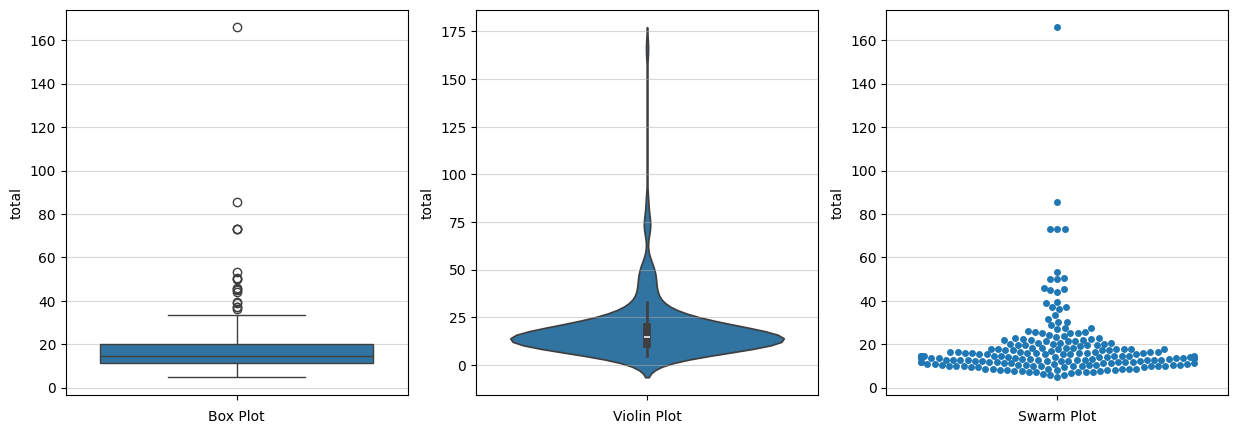

In [7]:
taxis_sample = data['total'].sample(n=200, random_state=42)
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)

# 상자수염그림
sns.boxplot(taxis_sample)

plt.xlabel('Box Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 2)

# 바이올린 플롯
sns.violinplot(taxis_sample)

plt.xlabel('Violin Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 3)

# 스웜 플롯
sns.swarmplot(taxis_sample)

plt.xlabel('Swarm Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.show()

# 큰 수의 법칙과 중심극한정리

**큰 수의 법칙(Law of Large Numbers)**
* 표본의 크기가 커질수록 그 표본의 평균이 모평균(기댓값)에 가까워진다는 원리

In [8]:
def coin_flip_simulation(num_flips):
    heads_count = 0
    probabilities = []

    # num_flips 만큼 0(뒷면) 또는 1(앞면)을 무작위로 생성
    for i in range(1, num_flips+1):
        if random.randint(0, 1) == 1:
            heads_count += 1

        # 현재까지 총 던진 횟수 대비 앞면이 나온 횟수의 비율을 계산하여 저장
        current_probability = heads_count / i
        probabilities.append(current_probability)

    return probabilities

In [9]:
# 동전 던지기 횟수 설정
total_flips = 1000 # 숫자를 늘릴 수록 그래프가 기대값에 수렴합니다.

results = coin_flip_simulation(total_flips)

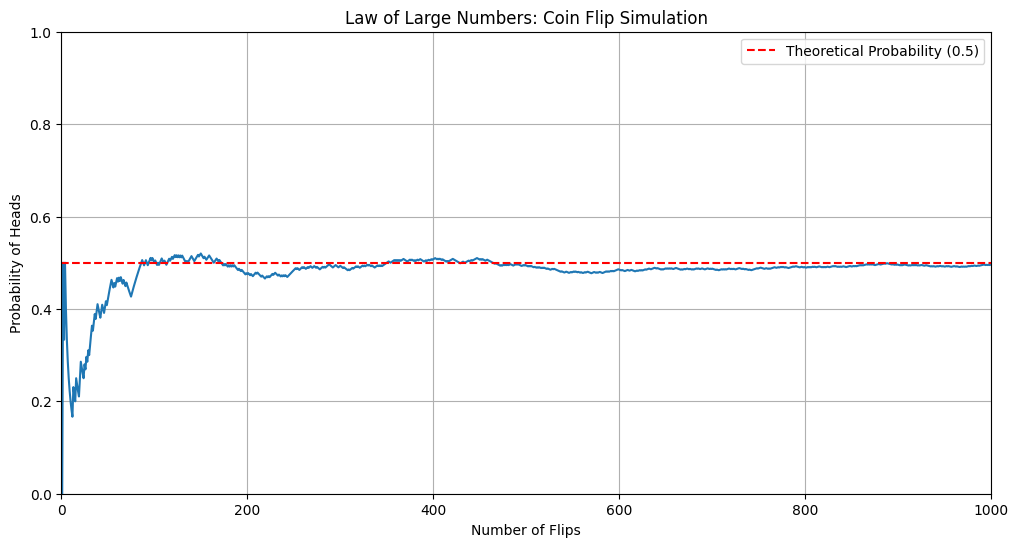

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, total_flips +1), results)
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical Probability (0.5)')

plt.title('Law of Large Numbers: Coin Flip Simulation')
plt.xlabel('Number of Flips')
plt.ylabel('Probability of Heads')
plt.legend()
plt.grid(True)

plt.xlim(0, total_flips)
plt.ylim(0, 1)

plt.show()

**중심극한정리(Central Limit Theorem, CLT)**
* 모집단의 분포와 상관 없이, 표본의 크기가 충분히 크다면 표본 평균의 분포는 정규분포에 가까워짐

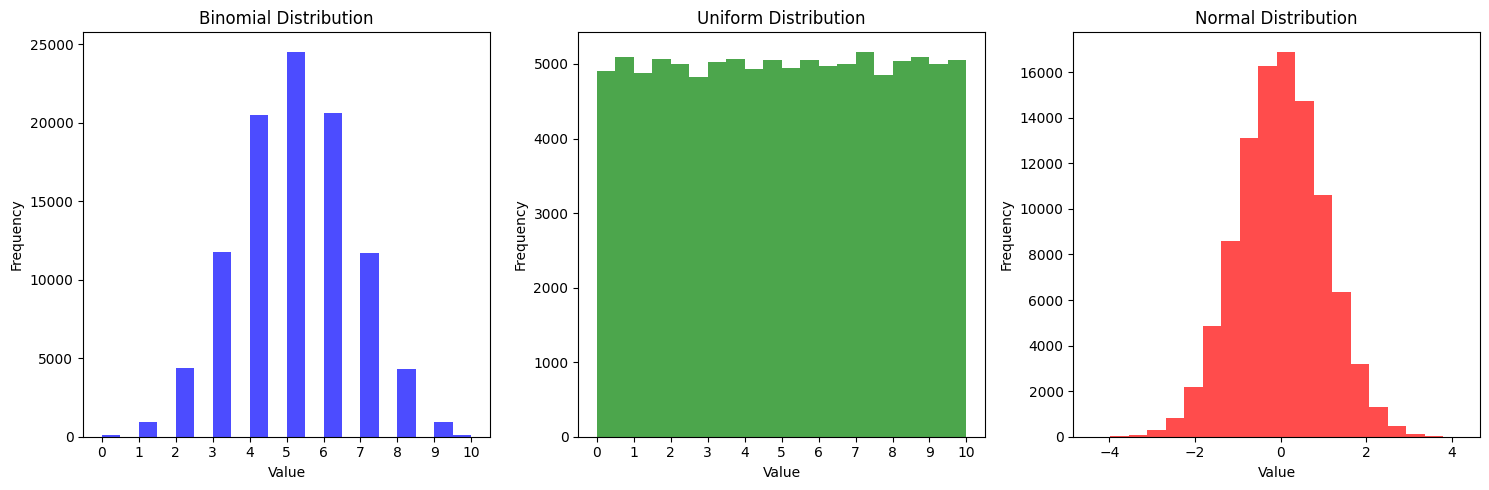

In [11]:
# 모집단 생성
np.random.seed(42)

sample_size = 100000
# 이항 분포 샘플
binomial_data = binom.rvs(n=10, p=0.5, size=sample_size)
# 균등 분포 샘플
uniform_data = uniform.rvs(loc=0, scale=10, size=sample_size)
# 정규 분포 샘플
normal_data = norm.rvs(loc=0, scale=1, size=sample_size)

#시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(binomial_data, bins=20, color="blue", alpha=0.7)
plt.title("Binomial Distribution")
plt.xlabel("Value")
plt.xticks(range(0,11))
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(uniform_data, bins=20, color="green", alpha=0.7)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xticks(range(0,11))

plt.subplot(1, 3, 3)
plt.hist(normal_data, bins=20, color="red", alpha=0.7)
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
# 표본 추출 횟수
num_samples = 500
sample_means = {
    "Binomial": [],
    "Uniform": [],
    "Normal": []
}

# 표본크기
sample_size = 50
#numpy.choice을 통해 샘플의 평균을 구하여 sample_means 딕셔너리 자료형에 각각 저장
for _ in range(num_samples):
    sample_means["Binomial"].append(np.mean(np.random.choice(binomial_data, size=sample_size)))
    sample_means["Uniform"].append(np.mean(np.random.choice(uniform_data, size=sample_size)))
    sample_means["Normal"].append(np.mean(np.random.choice(normal_data, size=sample_size)))

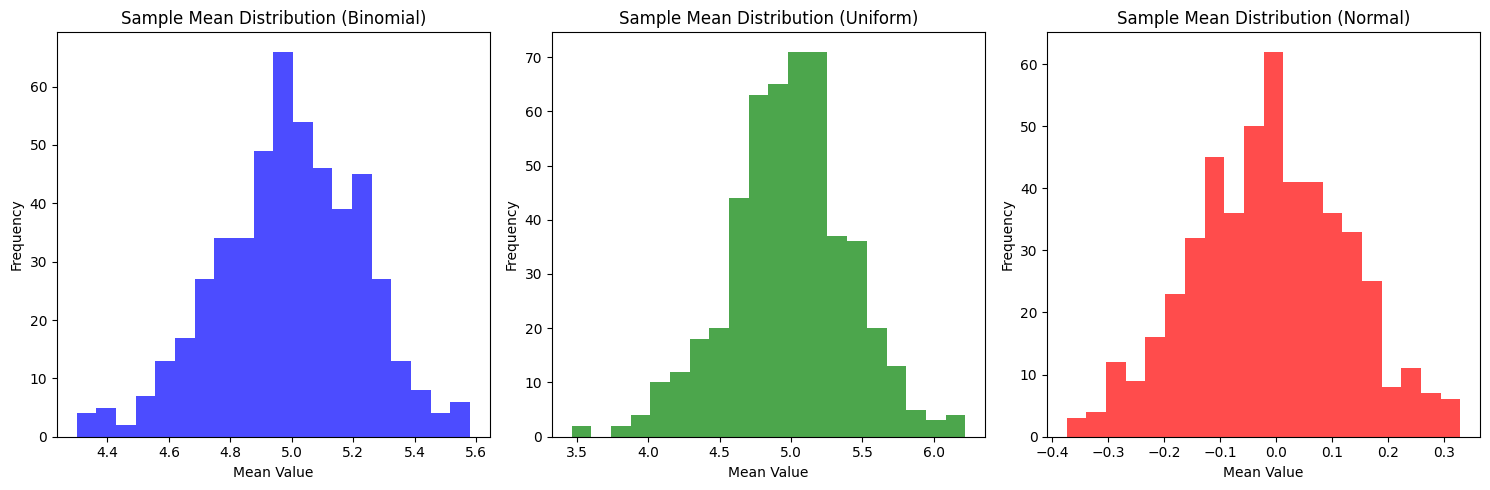

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sample_means["Binomial"], bins=20, color="blue", alpha=0.7)
plt.title("Sample Mean Distribution (Binomial)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(sample_means["Uniform"], bins=20, color="green", alpha=0.7)
plt.title("Sample Mean Distribution (Uniform)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(sample_means["Normal"], bins=20, color="red", alpha=0.7)
plt.title("Sample Mean Distribution (Normal)")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 정규분포

- 평균 50, 표준편차 10인 정규분포에서 1,000개의 데이터를 생성하고 히스토그램 그리기

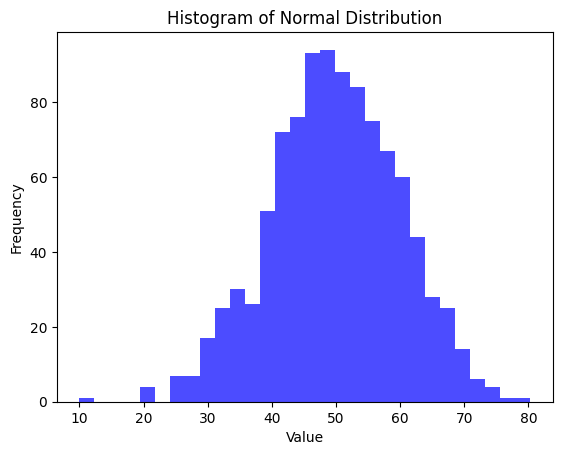

In [14]:
import matplotlib.pyplot as plt

# 정규분포 데이터 생성
data = np.random.normal(loc=50, scale=10, size=1000)

# 히스토그램 그리기
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 신뢰구간 구하기

In [15]:
# 모집단 생성
# 평균 175, 표준편차10인 정규분포를 따르는 10만 명의 키 데이터 생성
population_mean = 175
population_std = 10
population = norm.rvs(loc=population_mean, scale=population_std, size=100000)

In [16]:
# 표본 추출
sample_size = 100
sample = np.random.choice(population, size=sample_size)

In [17]:
# 표본 통계량 계산
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) # ddof = 자유도(Degrees of Freedom) 의미

print(f'표본 평균: {sample_mean}')
print(f'표본 표준 편차: {sample_std}')

표본 평균: 174.68038814135983
표본 표준 편차: 9.849531004398031


In [18]:
# 신뢰구간 계산
confidence_level = 0.95

n = len(sample)
dof = n - 1

# 신뢰수준에 따른 임계값 찾기
t_value = stats.t.ppf((1 + confidence_level) / 2, df=dof)

# 표준 오차 계산
std_error = sample_std / np.sqrt(n)

# 오차 범위
margin_of_error = t_value * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

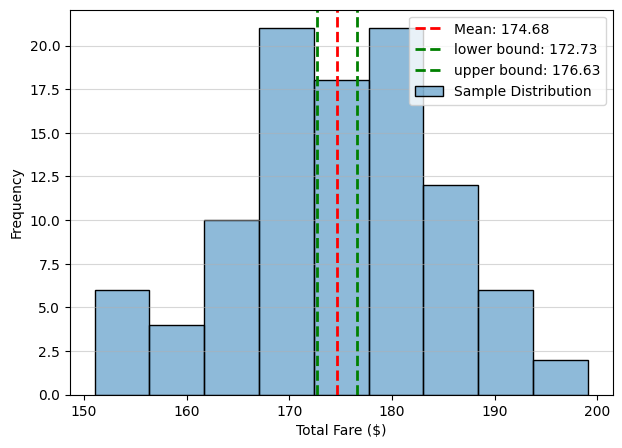

In [19]:
plt.figure(figsize=(7, 5))

sns.histplot(sample, alpha=0.5, label='Sample Distribution')

plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'lower bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'upper bound: {upper_bound:.2f}')

plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.show()

In [20]:
print("--- 표본 데이터 분석 결과 ---")
print(f"표본 크기: {n}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}\n")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]")

print("--- 95% 신뢰구간 추정 결과 ---")
print(f"실제 모평균 (우리가 모른다고 가정한 값): {population_mean}")

# 신뢰구간이 실제 모평균을 포함하는지 확인
if lower_bound <= population_mean <= upper_bound:
    print("\n🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.")
else:
    print("\n😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.")

--- 표본 데이터 분석 결과 ---
표본 크기: 100
표본 평균: 174.68
표본 표준편차: 9.85

추정된 95% 신뢰구간: [172.73, 176.63]
--- 95% 신뢰구간 추정 결과 ---
실제 모평균 (우리가 모른다고 가정한 값): 175

🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.


# 부트스트랩

In [21]:
# 모집단 생성
# 평균 175, 표준편차10인 정규분포를 따르는 10만 명의 키 데이터 생성
population_mean = 175
population_std = 10
population = norm.rvs(loc=population_mean, scale=population_std, size=100000)

In [22]:
# 표본 추출
sample_size = 100
sample = np.random.choice(population, size=sample_size)

In [23]:
# 부트스트랩 과정
n_bootstrap = 10000
bootstrap_means = []

np.random.seed(42)
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(
        sample,
        size=sample_size,
        replace = True
    )
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

In [24]:
# 부트스트래핑으로 신뢰구간 구하기
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

In [25]:
print(f"--- 원본 표본 데이터 ---")
print(f"표본 크기: {len(sample)}")
print(f"표본 평균: {np.mean(sample):.2f}")
print(f"추정된 95% 신뢰구간: [{lower_bound:.2f}, {upper_bound:.2f}]\n")

print(f"--- 부트스트랩 95% 신뢰구간 추정 결과 ---")
print(f"실제 모평균 (우리가 모른다고 가정한 값): {population_mean}")


# 신뢰구간이 실제 모평균을 포함하는지 확인
if lower_bound <= population_mean <= upper_bound:
    print("\n🎉 추정 성공! 신뢰구간이 실제 모평균을 포함했습니다.")
else:
    print("\n😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.")

--- 원본 표본 데이터 ---
표본 크기: 100
표본 평균: 172.94
추정된 95% 신뢰구간: [171.16, 174.74]

--- 부트스트랩 95% 신뢰구간 추정 결과 ---
실제 모평균 (우리가 모른다고 가정한 값): 175

😥 추정 실패! 신뢰구간이 실제 모평균을 포함하지 못했습니다.


# 문제 1. numpy 기술통계와 소수점 표현
📘 문제
- 다음 빈칸의 채워주세요


- 내장함수 help()와 dir()를 이용하거나 docs를 이용해서 다음 기술통계를 소수점 셋째자리까지 작성하기.
- 소수점자리는 f-string 문법을 이용해 표기하기 (참고:[f-string](https://blockdmask.tistory.com/429))
- 평균(_mean), 중앙값(_median), 분산(_var), 표준편차(_std) (참고 [numpy docs - mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) )

In [26]:
import numpy as np
data = [10, 20, 20, 30, 40]

In [28]:
#코드작성
# _____를 채워주세요.
_mean = np.mean(data)
_median = np.median(data)
_var = np.var(data)
_std = np.std(data)

print(f'평균은 {_mean:.3f}')
print(f'중앙값은 {_median:.3f}')
print(f'분산은 {_var:.3f}')
print(f'표준편차는 {_std:.3f}')

평균은 24.000
중앙값은 20.000
분산은 104.000
표준편차는 10.198


# 문제 2. 이상값과 분산 비교
**📘 문제**
- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**
1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [29]:
# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
# _____를 채워주세요.
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
# _____를 채워주세요.
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

📊 [1반 통계]
평균: 75.72
표준편차: 7.06
최소값: 60.69, 최대값: 92.18

📊 [2반 통계]
평균: 73.73
표준편차: 22.34
최소값: 0.00, 최대값: 130.00


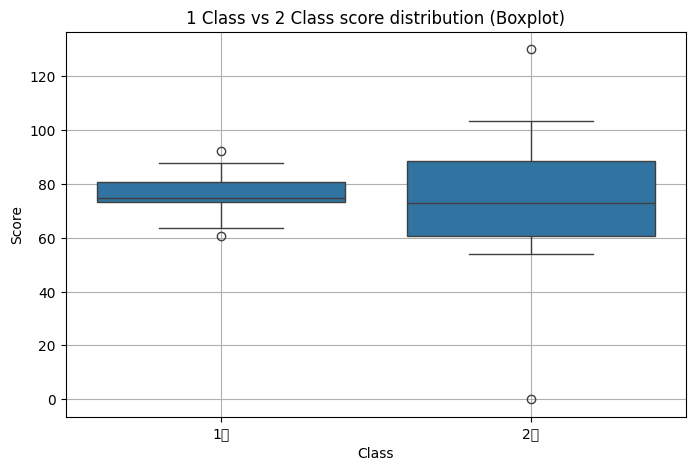

In [30]:
# 이곳에 코드를 작성해주세요.
# 각 반별 데이터 추출
class1 = df3[df3['class'] == '1반']['score']
class2 = df3[df3['class'] == '2반']['score']

# 통계값 계산
print("📊 [1반 통계]")
print(f"평균: {class1.mean():.2f}")
print(f"표준편차: {class1.std():.2f}")
print(f"최소값: {class1.min():.2f}, 최대값: {class1.max():.2f}")
print()

print("📊 [2반 통계]")
print(f"평균: {class2.mean():.2f}")
print(f"표준편차: {class2.std():.2f}")
print(f"최소값: {class2.min():.2f}, 최대값: {class2.max():.2f}")

# 박스플롯 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='score', data=df3)
plt.title("1 Class vs 2 Class score distribution (Boxplot)")
plt.xlabel("Class")
plt.ylabel("Score")
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**
1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?
    - 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?
    - 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?
    - 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?
    - 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?
    - 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?
    - 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
    - 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?
    - 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?

# 문제 3. 정규분포와 표준편차

**📘 문제**

- 정규분포와 표준편차의 개념을 실제 데이터에 적용해 보겠습니다.
- 정규분포를 따르는 점수 데이터에서 다음을 확인해 봅시다:
  - 평균 ±1σ, 평균 ±2σ 범위에 속한 값들의 비율은 실제로 얼마나 되는가?
  - 이 결과가 이론적인 68-95-99 법칙과 얼마나 유사한지 비교해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
2. 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
3. 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.


In [31]:
# 데이터 생성
np.random.seed(2025)
# _____를 채워주세요.
data = np.random.normal(loc=70, scale=10, size=1000)

# 평균과 표준편차
mean = np.mean(data)
std = np.std(data)

# 비율 계산
within_1 = np.mean((data >= mean - std) & (data <= mean + std))
within_2 = np.mean((data >= mean - 2*std) & (data <= mean + 2*std))

print(f"±1σ 범위 비율: {within_1:.2%}")
print(f"±2σ 범위 비율: {within_2:.2%}")

±1σ 범위 비율: 68.70%
±2σ 범위 비율: 95.00%


**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
3. 표준편차는 왜 중요한 지표인가요?
4. 이 개념이 실제로 어떻게 활용될 수 있을까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. **±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?**

   - ±1σ: 약 **68%**, ±2σ: 약 **95%**에 근접한 결과가 나왔다면
   - 이는 실제 데이터도 **정규분포의 특징**을 잘 따르고 있다는 의미입니다.
     > [질문] ±1σ, ±2σ 범위에 속한 데이터의 비율은 몇 %였나요?

2. **이 결과는 68–95–99 법칙과 얼마나 비슷했나요?**

   - 이론적으로 정규분포 데이터는 다음과 같은 비율을 따릅니다:
     - ±1σ: 약 **68.27%**
     - ±2σ: 약 **95.45%**
     - ±3σ: 약 **99.73%**
   - 실측 결과가 이와 유사하다면 → 정규분포 가정이 타당함
     > [참고] 이 법칙을 "정규분포의 3σ 법칙"이라고도 부릅니다.

3. **표준편차는 왜 중요한 지표인가요?**

   - 표준편차는 데이터가 **평균을 기준으로 얼마나 흩어져 있는지**를 나타냅니다.
   - 작을수록 데이터가 평균 근처에 몰리고, 클수록 퍼져 있는 분포입니다.
   - 정규분포에서는 표준편차만 알면 전체 분포의 **형태와 확률 예측**이 가능해집니다.
     >  [질문] 평균은 같지만 표준편차가 다른 두 분포는 어떤 차이가 있을까요?

4. **이 개념이 실제로 어떻게 활용될 수 있을까요?**
   - 시험 점수, IQ, 제품 품질 관리, 금융 리스크 분석 등에서 자주 사용됩니다.
   - 예: "이 제품은 평균 ±2σ 범위 안에 들어야 합격입니다."
     > [예시] 불량률 5% 이하를 목표로 할 때, ±2σ 기준을 사용하는 경우가 많습니다.

> 정규분포와 표준편차를 이해하면, **데이터 해석의 눈**이 넓어집니다!

</details>


# 문제 4. 로또 번호의 평균으로 정규분포 만들기

In [32]:
import random
def generate_lotto_numbers():
    min_num = 1
    max_num = 45
    num_picks = 6


    possible_numbers = list(range(min_num, max_num + 1))
    lotto_numbers = random.sample(possible_numbers, num_picks)
    # Sort the numbers for better readability (optional)
    lotto_numbers.sort()

    return lotto_numbers

In [33]:
num_simulations = 10000

all_lotto_numbers = []
lotto_means = []

for _ in range(num_simulations):
    current_lotto_draw = generate_lotto_numbers()
    all_lotto_numbers.extend(current_lotto_draw)
    lotto_means.append(np.mean(current_lotto_draw))

print(f"Completed {num_simulations} Lotto simulations.")
print(f"Total individual numbers collected: {len(all_lotto_numbers)}")
print(f"Total means collected: {len(lotto_means)}")

Completed 10000 Lotto simulations.
Total individual numbers collected: 60000
Total means collected: 10000


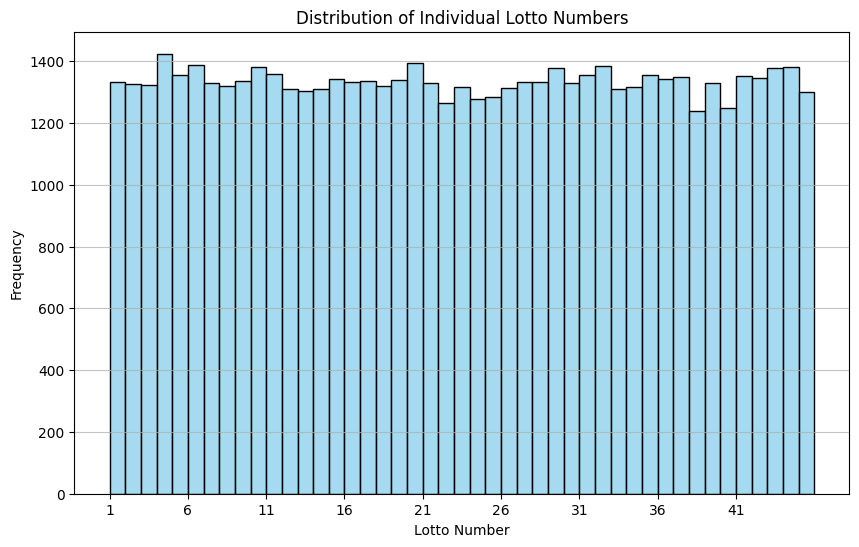

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(all_lotto_numbers, bins=range(1, 45 + 2), kde=False, color='skyblue')
plt.title('Distribution of Individual Lotto Numbers')
plt.xlabel('Lotto Number')
plt.ylabel('Frequency')
plt.xticks(range(1, 45 + 1, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

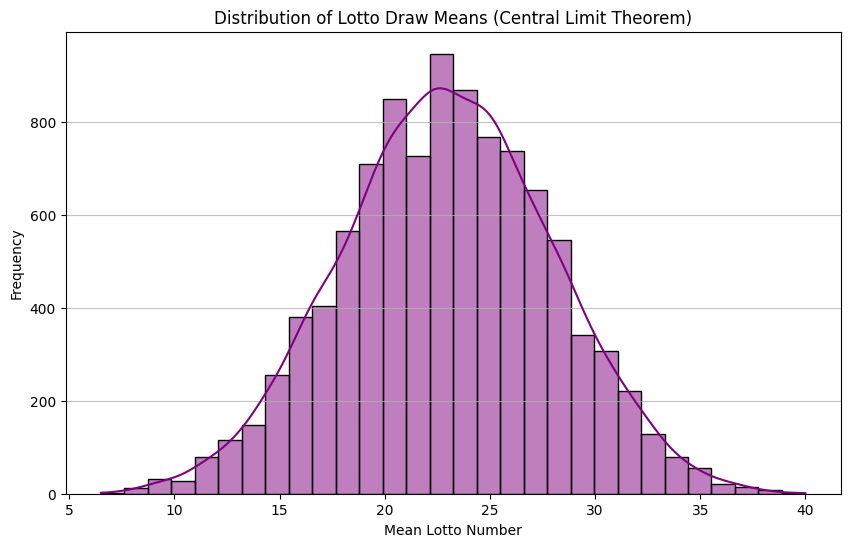

In [35]:
plt.figure(figsize=(10, 6))
# _____를 채워주세요.
sns.histplot(lotto_means, kde=True, color='purple', bins=30)
plt.title('Distribution of Lotto Draw Means (Central Limit Theorem)')
plt.xlabel('Mean Lotto Number')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 문제 5. 신뢰구간 계산과 해석


📘 문제

- 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

- 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

- 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

- 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.


📌 아래를 수행해 보세요:

- 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

- 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

- 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.


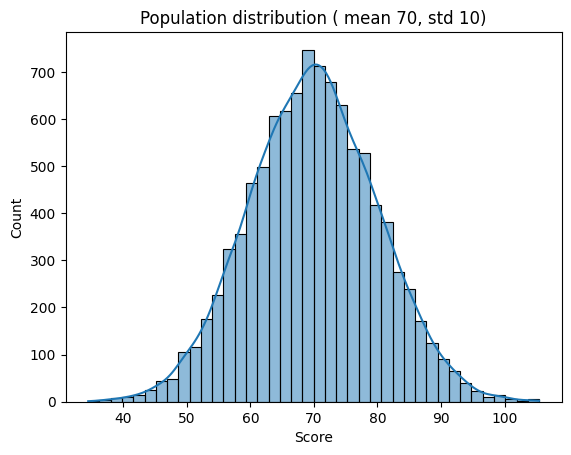

In [36]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("Population distribution ( mean 70, std 10)")
plt.xlabel("Score")
plt.show()

In [37]:
# Q1. 표본 30명을 무작위로 추출하고, 표본 평균, 표준편차, 표준오차 계산

sample = np.random.choice(population, size=30)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # 표본 표준편차 (ddof=1)
se = sample_std / np.sqrt(30)        # 표준오차

print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"표준오차(SE): {se:.2f}")

표본 평균: 71.52
표본 표준편차: 9.34
표준오차(SE): 1.70


In [47]:
# Q2. 모집단 표준편차를 알고 있다고 가정하고, z-분포로 95% 신뢰구간 계산

sigma = 15  # 모집단 표준편차를 알고 있다고 가정
z = 1.96    # 95% 신뢰수준에서의 z값

ci_low = sample_mean - z * (sigma / np.sqrt(30))
ci_high = sample_mean + z * (sigma / np.sqrt(30))

print(f"[z-분포 기반] 95% 신뢰구간: ({ci_low:.2f}, {ci_high:.2f})")

[z-분포 기반] 95% 신뢰구간: (66.15, 76.88)


In [45]:
# Q3. 모집단 표준편차를 모른다고 가정하고, t-분포로 95% 신뢰구간 계산

from scipy import stats

t = stats.t.ppf(0.975, df=29)  # df = n - 1 = 29
# _____를 채워주세요.
ci_low_t = sample_mean - t * sample_std / np.sqrt(30)
ci_high_t = sample_mean + t * sample_std / np.sqrt(30)

print(f"[t-분포 기반] 95% 신뢰구간: ({ci_low_t:.2f}, {ci_high_t:.2f})")

[t-분포 기반] 95% 신뢰구간: (68.03, 75.00)


In [ ]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 t-분포 기반 신뢰구간 계산

# 90%
t_90 = stats.t.ppf(0.95, df=29)  # 양쪽 각각 5%
ci90 = (sample_mean - t_90 * se, sample_mean + t_90 * se)

# 99%
t_99 = stats.t.ppf(0.995, df=29)  # 양쪽 각각 0.5%
ci99 = (sample_mean - t_99 * se, sample_mean + t_99 * se)

print(f"[t-분포 기반] 90% 신뢰구간: ({ci90[0]:.2f}, {ci90[1]:.2f})")
print(f"[t-분포 기반] 99% 신뢰구간: ({ci99[0]:.2f}, {ci99[1]:.2f})")

[t-분포 기반] 90% 신뢰구간: (68.62, 74.41)
[t-분포 기반] 99% 신뢰구간: (66.82, 76.22)


🧠 데이터를 어떻게 읽을까요?

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?

- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

- **z-분포와 t-분포로 계산한 신뢰구간은 어떤 차이가 있나요?**  
  t-분포로 계산한 신뢰구간이 z-분포보다 약간 더 넓습니다.  
  이는 모집단의 표준편차를 모를 때, **표본의 표준편차를 사용하는데서 오는 추가적인 불확실성을 보정**해주기 때문입니다.  
  (표본 크기가 커질수록 t-분포는 z-분포에 근사하여 차이가 거의 없어집니다.)

- **신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?**  
  신뢰수준이 높아질수록 (예: 90% → 95% → 99%) 신뢰구간의 폭은 **더 넓어집니다.**  
  이는 "모평균이 이 구간 안에 있을 것"이라는 주장에 대한 **확신(신뢰)의 수준을 높이기 위해** 더 넓은 범위를 예측해야 하기 때문입니다.  
  즉, 더 높은 신뢰도는 더 넓은 구간을 필요로 하는 **정확성과의 트레이드오프** 관계에 있습니다.

- **신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?**  
  넓은 신뢰구간은 추정의 **정밀도가 낮다**는 것을 의미합니다.  
  예를 들어 "내일 기온은 -10도에서 40도 사이일 거야"라는 예측은 맞을 확률은 높지만 쓸모는 없는 것과 같습니다.  
  따라서 신뢰구간은 **높은 신뢰수준을 유지하면서도, 의사결정에 도움이 될 만큼 충분히 좁은 것**이 이상적입니다.
  → 신뢰구간은 **적당히 좁고**, 모집단 평균을 잘 포함하는 것이 이상적입니다.

- **이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?**  
  예를 들어, "고객 만족도 평균이 68~72점 사이"라는 신뢰구간이 있다면,  
  마케팅에서는 이 범위를 근거로
  - **신규 제품 만족도 타겟 설정**
  - **고객 충성도 유지 기준 수립**
  - **점수 변동이 통계적으로 유의한지 판단**  
    등에 활용할 수 있습니다.  
    신뢰구간은 단순한 평균보다 **전략적 의사결정에 더 강력한 근거**가 됩니다.
